# **Fuzzy C-Means Clustering: A Soft Clustering Approach**
### Author: Mohammed A. Shehab

---

## **Introduction**
This notebook demonstrates the implementation of **Fuzzy C-Means (FCM)** clustering, a soft clustering technique that assigns data points to multiple clusters with varying degrees of membership.

The implementation uses the `skfuzzy` library to:
- Generate synthetic data.
- Perform Fuzzy C-Means clustering.
- Visualize clustering results with membership values.

---


In [1]:
# insatll FCM, note run it at command line
# !conda install -c conda-forge scikit-fuzzy

In [2]:
import skfuzzy as fuzz

print("scikit-fuzzy version:", fuzz.__version__)

scikit-fuzzy version: 0.5.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt


## **Generate Sample Data**

In [4]:
np.random.seed(42)
data = np.vstack((
    np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[6, 6], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[10, 2], scale=0.5, size=(50, 2))
)).T  # Transpose for compatibility with skfuzzy

## Visualize the data

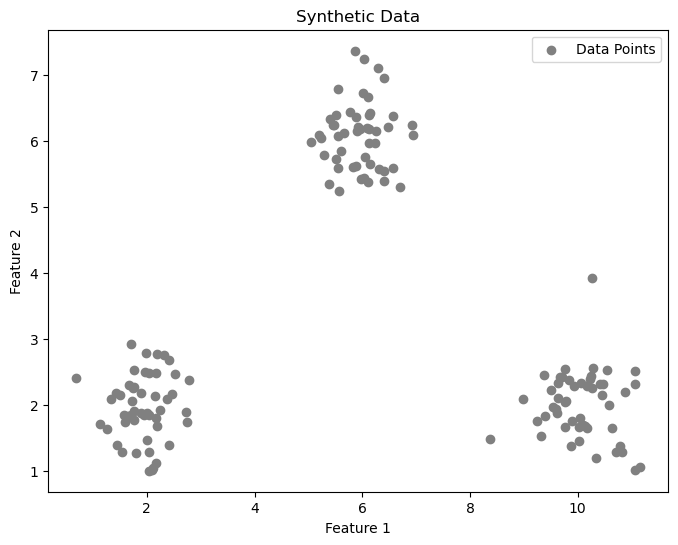

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(data[0, :], data[1, :], c='gray', label="Data Points")
plt.title("Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Apply Fuzzy C-Means Clustering

In [6]:
# Parameters for Fuzzy C-Means
c = 3           # Number of clusters
m = 2           # Fuzziness parameter
error = 0.005   # Stopping criterion
maxiter = 1000  # Maximum iterations

# Perform Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=data,  # Input data
    c=c,        # Number of clusters
    m=m,        # Fuzziness parameter
    error=error,  # Stopping criterion
    maxiter=maxiter,  # Maximum iterations
    init=None,   # Optional: Initial guess
    seed=42      # Seed for reproducibility
)

print("Centroids:\n", cntr)
print("Membership Matrix (first 5 points):\n", u[:, :5])

Centroids:
 [[10.06736003  1.99669489]
 [ 5.95155091  6.06604495]
 [ 1.9321831   1.96282498]]
Membership Matrix (first 5 points):
 [[1.64360541e-03 1.24953398e-02 1.31437683e-04 1.62668730e-02
  1.77271267e-03]
 [3.26131240e-03 3.14181766e-02 2.58604818e-04 3.66772969e-02
  3.83137359e-03]
 [9.95095082e-01 9.56086484e-01 9.99609957e-01 9.47055830e-01
  9.94395914e-01]]


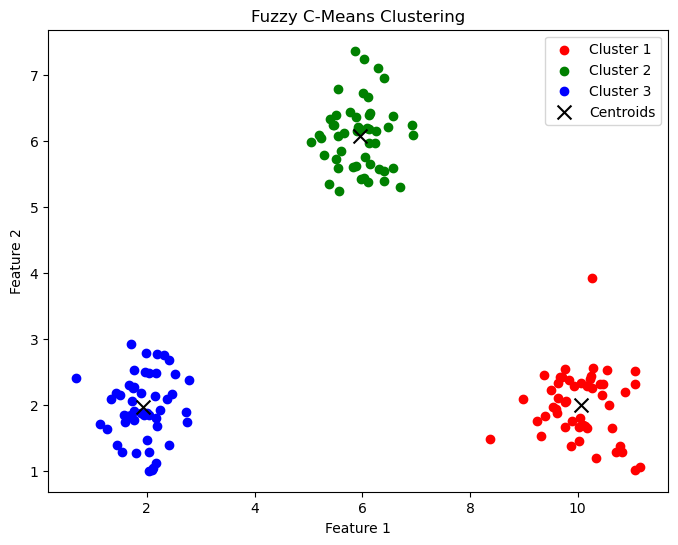

In [7]:
cluster_membership = np.argmax(u, axis=0)

# Visualize the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(c):
    plt.scatter(data[0, cluster_membership == i], data[1, cluster_membership == i], c=colors[i], label=f"Cluster {i+1}")
plt.scatter(cntr[:, 0], cntr[:, 1], c='k', marker='x', s=100, label="Centroids")
plt.title("Fuzzy C-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## **Discussion**
### **Key Features of Fuzzy C-Means:**
1. **Soft Membership:** Each data point can belong to multiple clusters, with membership values indicating the degree of association.
2. **Cluster Centroids:** Centroids are calculated as weighted averages based on membership values.
3. **Fuzziness Parameter (\( m \)):** Controls the "softness" of clustering:
   - \( m = 1 \): Equivalent to hard clustering (e.g., K-Means).
   - \( m > 1 \): Increases the overlap between clusters.

### **Applications:**
- Customer segmentation where customers may belong to multiple segments.
- Image segmentation for detecting overlapping regions.
- Medical diagnostics for identifying patients at varying levels of risk.

---


In [8]:
!pip install scikit-image

In [9]:
from skimage import data, color
from skimage.io import imshow
from skimage.color import rgb2gray

## Load and Preprocess Image

In [10]:
# Step 1: Load and Preprocess Image
# Using an example grayscale image from skimage
image = color.rgb2gray(data.astronaut())  # Convert astronaut image to grayscale
image = image / np.max(image)  # Normalize pixel intensities to [0, 1]

# Flatten the image for Fuzzy C-Means clustering
pixel_values = image.flatten()

# Step 2: Apply Fuzzy C-Means Clustering
# Reshape pixel data for clustering
data_reshaped = pixel_values[np.newaxis, :]  # Add dimension for FCM compatibility

## Perform Fuzzy C-Means clustering


In [11]:
c = 3  # Number of clusters
m = 2  # Fuzziness parameter
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_reshaped, c=c, m=m, error=0.005, maxiter=1000, init=None
)

## Segment Image Based on Cluster Membership

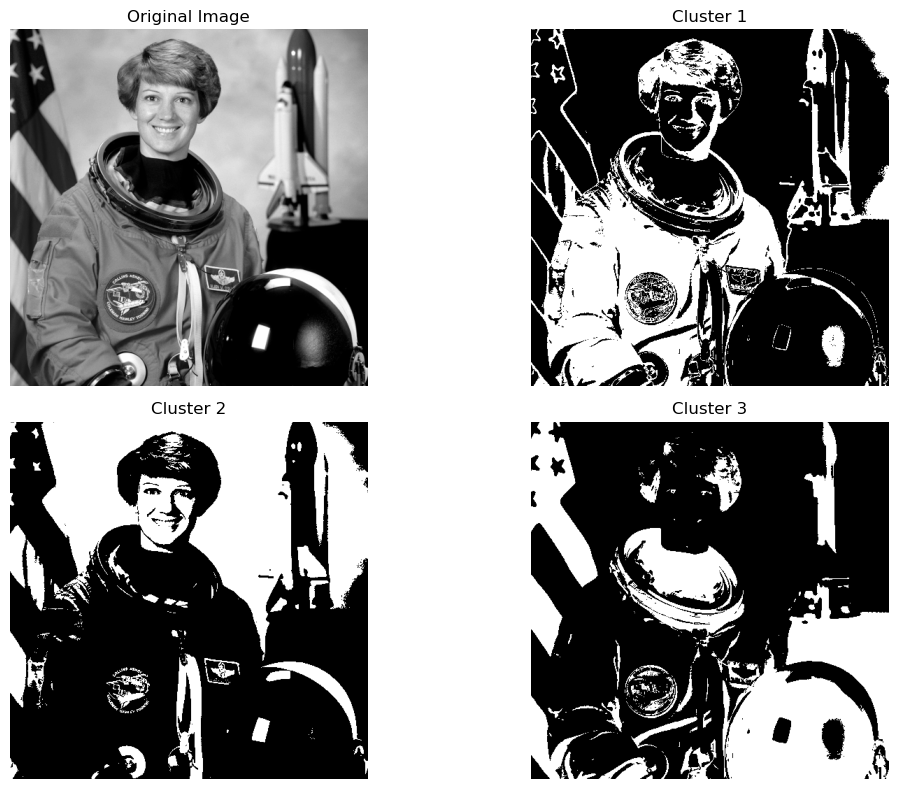

In [12]:
# Assign each pixel to the cluster with the highest membership
cluster_membership = np.argmax(u, axis=0)

# Reshape cluster memberships back to the image shape
segmented_image = cluster_membership.reshape(image.shape)

# Step 4: Visualize Results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

# Clustered Images
for i in range(c):
    plt.subplot(2, 2, i + 2)
    plt.title(f"Cluster {i+1}")
    plt.imshow(segmented_image == i, cmap="gray")
    plt.axis("off")

plt.tight_layout()
plt.show()
